## Walmart Sales Prediction

27.10.2023

In [23]:
#Importing necessary libraries
import modin.pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
sales_data = pd.read_csv("Walmart.csv")
sales_data = sales_data.rename({'Holiday_Flag': "is_holiday"}, axis = 1)
sales_data.columns = sales_data.columns.str.lower()

To remove this warning, run the following python code before doing dataframe operations:

    from distributed import Client

    client = Client()



In [3]:
sales_data.head()

,store,date,weekly_sales,is_holiday,temperature,fuel_price,cpi,unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [4]:
sales_data.tail()

,store,date,weekly_sales,is_holiday,temperature,fuel_price,cpi,unemployment
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667
6434,45,26-10-2012,760281.43,0,58.85,3.882,192.308899,8.667


In [5]:
sales_data.columns

Index(['store', 'date', 'weekly_sales', 'is_holiday', 'temperature',
       'fuel_price', 'cpi', 'unemployment'],
      dtype='object')

In [6]:
sales_data.describe().T

,count,mean,std,min,25%,50%,75%,max
store,6435.0,2.300000e+01,12.988182,1.000,12.000,23.000000,3.400000e+01,4.500000e+01
weekly_sales,6435.0,1.046965e+06,564366.622054,209986.250,553350.105,960746.040000,1.420159e+06,3.818686e+06
is_holiday,6435.0,6.993007e-02,0.255049,0.000,0.000,0.000000,0.000000e+00,1.000000e+00
temperature,6435.0,6.066378e+01,18.444933,-2.060,47.460,62.670000,7.494000e+01,1.001400e+02
fuel_price,6435.0,3.358607e+00,0.459020,2.472,2.933,3.445000,3.735000e+00,4.468000e+00
cpi,6435.0,1.715784e+02,39.356712,126.064,131.735,182.616521,2.127433e+02,2.272328e+02
unemployment,6435.0,7.999151e+00,1.875885,3.879,6.891,7.874000,8.622000e+00,1.431300e+01


In [7]:
sales_data.dtypes

store             int64
date             object
weekly_sales    float64
is_holiday        int64
temperature     float64
fuel_price      float64
cpi             float64
unemployment    float64
dtype: object

In [8]:
sales_data.info()

<class 'modin.pandas.dataframe.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   store         6435 non-null   int64  
 1   date          6435 non-null   object 
 2   weekly_sales  6435 non-null   float64
 3   is_holiday    6435 non-null   int64  
 4   temperature   6435 non-null   float64
 5   fuel_price    6435 non-null   float64
 6   cpi           6435 non-null   float64
 7   unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


<Axes: xlabel='weekly_sales', ylabel='Count'>

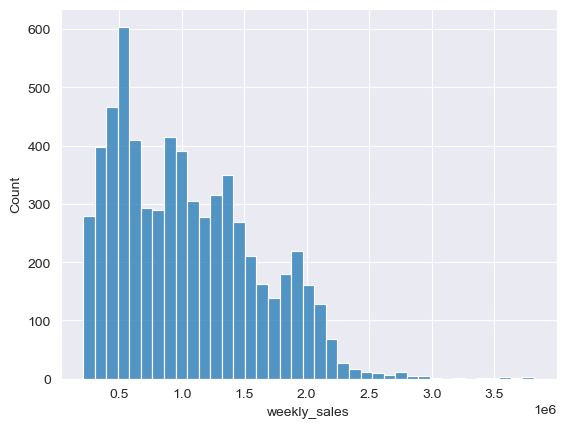

In [9]:
sns.histplot(data = sales_data, x = "weekly_sales")

<Axes: xlabel='temperature', ylabel='Count'>

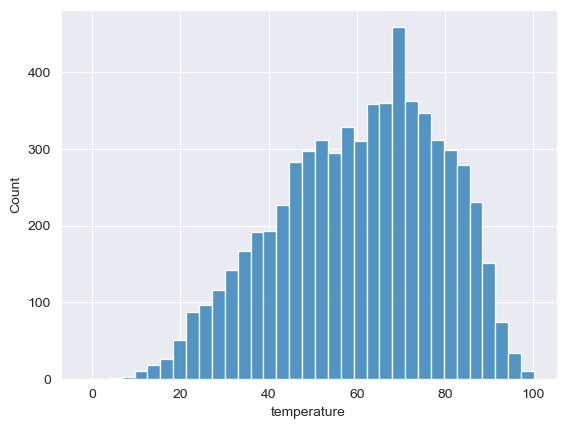

In [10]:
sns.histplot(data = sales_data, x = "temperature")

<Axes: xlabel='fuel_price', ylabel='Count'>

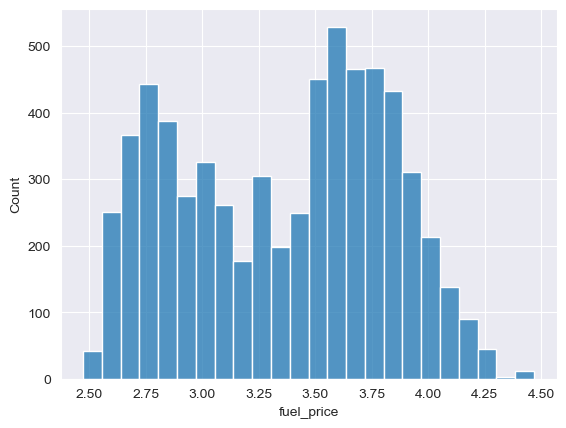

In [11]:
sns.histplot(data = sales_data, x = "fuel_price")

In [20]:
sales_data_timeless = sales_data.drop(columns = "date")


<Axes: >

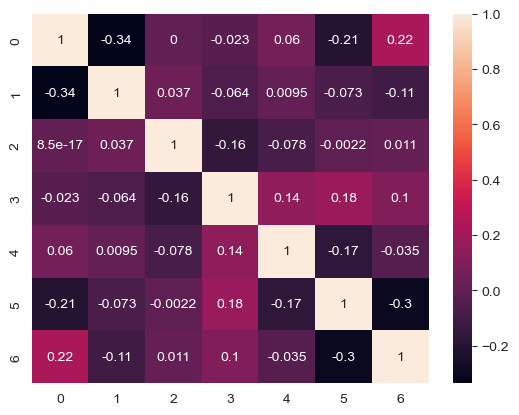

In [22]:
sns.heatmap(data = sales_data_timeless.corr(), annot = True)

In [26]:
models = ["Logistic Regression","SVM","Decision Tree","Random Forest"]
acc_list = []
auc_list = []
cm_list = []

In [27]:
for model in models:
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    acc_list.append(metrics.accuracy_score(y_test,y_pred))
    fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred)
    auc_list.append(round(metrics.auc(fpr,tpr),2))
    cm_list.append(confusion_matrix(y_test,y_pred))

NameError: name 'pipeline_list' is not defined